In [633]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
path  = './ml-1m'

# 1.datasets overview

movielens-1m dataset  
## files
+ ratings.dat
+ movies.dat
+ users.dat

In [12]:
os.listdir(path)

['movies.dat', 'ratings.dat', 'README', 'users.dat']

In [34]:
with open(path+"/README", 'r') as f:
    data = f.read()
    print(data)

SUMMARY

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

USAGE LICENSE

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under the following conditions:

     * The user may not state or imply any endorsement from the
       University of Minnesota or the GroupLens Research Group.

     * The user must acknowledge the use of the data set in
       publications resulting from the use of the data set
       (see below for citation information).

     * The user may not redistribute the data without separate
       permission.

     * The user may not use this information for any commercial or
       revenue-bearing purposes without first obtaining permission
       from a facult

In [466]:
def load_ratings():
    COL_NAME = ['userId','movieId','rating','timestamp']
    df = pd.read_csv(os.path.join(path,"ratings.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

def load_movies():
    COL_NAME = ['movieId','title','genres']
    df = pd.read_csv(os.path.join(path,"movies.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

def load_users():
    COL_NAME = ['userId','gender','age','Occupation','zip_code']
    df = pd.read_csv(os.path.join(path,"users.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

will change zipcode --> state , income

# 2. X_fields conception

### continuous fields : 


+ median_household_income(from zipcode) ex)66659



### categoricul fields :
+ userId  ex)1
+ gender ex)F
+ age ex)1
+ occupation ex)10 
+ state(from zipcode) ex) MI
+ movieId ex)1193
+ genres ex)Comedy
+ year ex)1995


# 3. preprocess datasets

## data 1.Ratings_df

In [595]:
ratings_df = load_ratings()
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [596]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userId     1000209 non-null  int64
 1   movieId    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [597]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [598]:
ratings_df.drop("timestamp",axis=1 ,inplace =True)

In [599]:
ratings_df.head()

,userId,movieId,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


<AxesSubplot:ylabel='Frequency'>

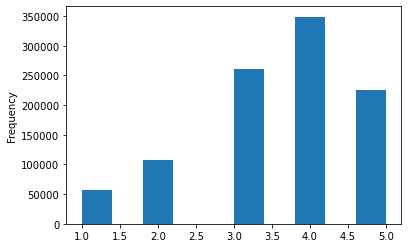

In [600]:
ratings_df.rating.plot.hist()

## data 2.Movies_df

In [500]:
movies_df = load_movies()
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [501]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


### field : genres

In [502]:
genres_df = movies_df.genres.str.get_dummies(sep =  "|")
genres_df

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [503]:
movies_df.drop("genres",axis=1 , inplace = True)

In [504]:
movies_df = pd.concat([movies_df,genres_df], axis= 1 )

In [505]:
movies_df.head()

,movieId,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### feild : year from title

In [506]:
movies_df["year"] = movies_df.title.str.extract("(\(\d\d\d\d\))")

In [507]:
movies_df.year = movies_df.year.apply(lambda x : x.replace("(","").replace(")",""))

In [508]:
movies_df.year = movies_df.year.astype("int32")

In [509]:
movies_df.drop("title",axis = 1 ,inplace = True)

In [510]:
movies_df.head()

,movieId,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1995
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1995
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995


/opt/homebrew/Caskroom/miniforge/base/envs/m1/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


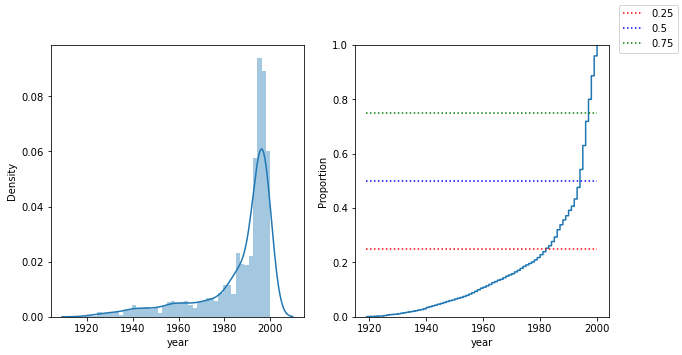

In [512]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (10,5))

sns.distplot(movies_df.year, ax= ax1)
sns.ecdfplot(movies_df.year, ax =ax2)
ax2.plot([movies_df.year.min(),movies_df.year.max()],[0.25,0.25], "r:" ,label = "0.25")
ax2.plot([movies_df.year.min(),movies_df.year.max()],[0.5,0.5], "b:", label = "0.5")
ax2.plot([movies_df.year.min(),movies_df.year.max()],[0.75,0.75], "g:" , label = "0.75")
fig.legend()

In [322]:
#cut by bin ==> [under 1980 , 1980~1990, 1990~2000, 2000~]

In [514]:
bins = list(range(1980,movies_df.year.max()+1,5))
bins.append(0)
bins = sorted(bins)
bins

[0, 1980, 1985, 1990, 1995, 2000]

In [515]:
labels = list(range(len(bins)-1))
labels = ["year_" + str(i) for i in labels]
labels

['year_0', 'year_1', 'year_2', 'year_3', 'year_4']

In [516]:
movies_df.year = pd.cut(movies_df['year'],bins = bins, right= True,labels = labels)

In [517]:
movies_df

,movieId,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,year_3
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,year_3
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,year_3
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,year_3
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,year_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,year_4
3879,3949,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,year_4
3880,3950,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,year_4
3881,3951,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,year_4


In [518]:
year_df = pd.get_dummies(movies_df.year)

In [519]:
movies_df = pd.concat([movies_df,year_df], axis= 1)
movies_df.drop("year",axis=1 , inplace = True)
movies_df.head()

,movieId,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,...,Romance,Sci-Fi,Thriller,War,Western,year_0,year_1,year_2,year_3,year_4
0,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,4,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## data 3.users_df

### field : gender

In [433]:
users_df = load_users()
users_df.head()

,userId,gender,age,Occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [434]:
users_df = pd.concat([users_df, pd.get_dummies(users_df.gender, prefix = "gender")],axis=1)
users_df.drop("gender",axis= 1,inplace=True)

In [435]:
users_df

,userId,age,Occupation,zip_code,gender_F,gender_M
0,1,1,10,48067,1,0
1,2,56,16,70072,0,1
2,3,25,15,55117,0,1
3,4,45,7,02460,0,1
4,5,25,20,55455,0,1
...,...,...,...,...,...,...
6035,6036,25,15,32603,1,0
6036,6037,45,1,76006,1,0
6037,6038,56,1,14706,1,0
6038,6039,45,0,01060,1,0


### field : age

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"



/opt/homebrew/Caskroom/miniforge/base/envs/m1/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


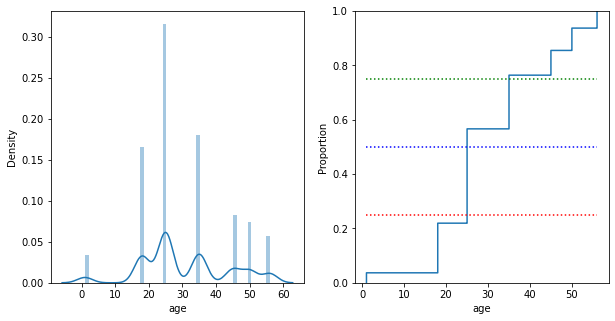

In [436]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=  (10,5))

sns.distplot(users_df.age , ax = ax1)
sns.ecdfplot(users_df.age, ax = ax2)
ax2.plot([users_df.age.min(),users_df.age.max()],[0.25,0.25], "r:" ,label = "0.25")
ax2.plot([users_df.age.min(),users_df.age.max()],[0.5,0.5], "b:", label = "0.5")
ax2.plot([users_df.age.min(),users_df.age.max()],[0.75,0.75], "g:" , label = "0.75")

In [437]:
ages_df = pd.get_dummies(users_df.age)

In [438]:
ages_df.columns = ["Under 18","18-24", "25-34","35-44","45-49", "50-55","56+"]
ages_df

,Under 18,18-24,25-34,35-44,45-49,50-55,56+
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
6035,0,0,1,0,0,0,0
6036,0,0,0,0,1,0,0
6037,0,0,0,0,0,0,1
6038,0,0,0,0,1,0,0


In [439]:
users_df  = pd.concat([users_df, ages_df], axis = 1)

In [440]:
users_df.drop("age",axis=1,inplace = True)
users_df

,userId,Occupation,zip_code,gender_F,gender_M,Under 18,18-24,25-34,35-44,45-49,50-55,56+
0,1,10,48067,1,0,1,0,0,0,0,0,0
1,2,16,70072,0,1,0,0,0,0,0,0,1
2,3,15,55117,0,1,0,0,1,0,0,0,0
3,4,7,02460,0,1,0,0,0,0,1,0,0
4,5,20,55455,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6035,6036,15,32603,1,0,0,0,1,0,0,0,0
6036,6037,1,76006,1,0,0,0,0,0,1,0,0
6037,6038,1,14706,1,0,0,0,0,0,0,0,1
6038,6039,0,01060,1,0,0,0,0,0,1,0,0


### field : Occupation

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

/opt/homebrew/Caskroom/miniforge/base/envs/m1/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Occupation', ylabel='Density'>

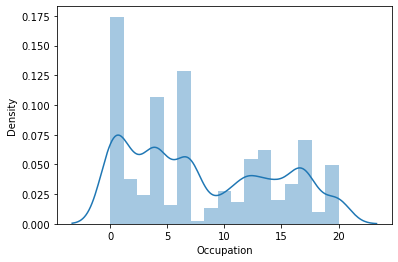

In [441]:
sns.distplot(users_df.Occupation,kde = True)

In [442]:
occupation_name = ["other",
"academic/educator",
 "artist",
"clerical/admin",
"college/grad student",
"customer service",
"doctor/health care",
"executive/managerial",
"farmer",
"homemaker",
"K-12 student",
"lawyer",
"programmer",
"retired",
"sales/marketing",
"scientist",
"self-employed",
"technician/engineer",
"tradesman/craftsman",
"unemployed",
"writer"]

In [443]:
occupation_df = pd.get_dummies(users_df.Occupation)

In [444]:
occupation_df.columns =occupation_name
occupation_df

,other,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,lawyer,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6036,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6037,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [445]:
users_df = pd.concat([users_df, occupation_df], axis=1)
users_df.drop("Occupation",axis=1,inplace = True)
users_df

,userId,zip_code,gender_F,gender_M,Under 18,18-24,25-34,35-44,45-49,50-55,...,lawyer,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
0,1,48067,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,70072,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,55117,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,02460,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,55455,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,6036,32603,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6036,6037,76006,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6037,6038,14706,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,6039,01060,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### field : state from zipcode

#### zipcode feature extraction

In [446]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode = True)

In [447]:
#zipcode dictionary example
search.by_zipcode(48067).items()

[('zipcode', '48067'),
 ('zipcode_type', 'Standard'),
 ('major_city', 'Royal Oak'),
 ('post_office_city', 'Royal Oak, MI'),
 ('common_city_list', ['Royal Oak']),
 ('county', 'Oakland County'),
 ('state', 'MI'),
 ('lat', 42.49),
 ('lng', -83.14),
 ('timezone', 'Eastern'),
 ('radius_in_miles', 2.0),
 ('area_code_list', ['248', '313']),
 ('population', 24458),
 ('population_density', 5328.0),
 ('land_area_in_sqmi', 4.59),
 ('water_area_in_sqmi', 0.0),
 ('housing_units', 13014),
 ('occupied_housing_units', 12146),
 ('median_home_value', 159500),
 ('median_household_income', 66659),
 ('bounds_west', -83.172176),
 ('bounds_east', -83.110736),
 ('bounds_north', 42.504651),
 ('bounds_south', 42.474169)]

### field : state

In [448]:
users_df["state"] = users_df.zip_code.apply(lambda x: search.by_zipcode(x).to_dict()["state"])

In [449]:
users_df.state

0       MI
1       LA
2       MN
3       MA
4       MN
        ..
6035    FL
6036    TX
6037    NY
6038    MA
6039    NY
Name: state, Length: 6040, dtype: object

In [450]:
users_df = pd.concat([users_df,pd.get_dummies(users_df.state)],axis=1)
users_df.head()

,userId,zip_code,gender_F,gender_M,Under 18,18-24,25-34,35-44,45-49,50-55,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,1,48067,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,70072,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,55117,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,02460,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,55455,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [576]:
users_df.drop("state",axis=1,inplace=True)

### field : state_median_income from zipcode

In [451]:
users_df["median_household_income"] = users_df["zip_code"].apply(lambda x: search.by_zipcode(x).to_dict()["median_household_income"])

In [452]:
#null check
users_df.median_household_income.isna().sum()

301

In [453]:
#fillna with mean value
users_df.median_household_income = users_df.median_household_income.fillna(users_df.median_household_income.mean())

In [460]:
#drop zipcode  -- > too sparse
users_df.drop("zip_code",axis=1 , inplace = True)
users_df.head()

KeyError: "['zip_code'] not found in axis"

In [462]:
users_df

,userId,gender_F,gender_M,Under 18,18-24,25-34,35-44,45-49,50-55,56+,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,median_household_income
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,66659.000000
1,2,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,41948.000000
2,3,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44040.000000
3,4,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,102276.000000
4,5,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,66834.142534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,6036,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17857.000000
6036,6037,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,44363.000000
6037,6038,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,50647.000000
6038,6039,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,52607.000000


## concat X_fields



In [601]:
ratings_df.head()

,userId,movieId,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [602]:
movies_df.head()

,movieId,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,...,Romance,Sci-Fi,Thriller,War,Western,year_0,year_1,year_2,year_3,year_4
0,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,4,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [603]:
users_df.head()

,userId,gender_F,gender_M,Under 18,18-24,25-34,35-44,45-49,50-55,56+,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,median_household_income
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,66659.000000
1,2,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,41948.000000
2,3,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44040.000000
3,4,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,102276.000000
4,5,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,66834.142534


In [604]:
ratings_df = ratings_df.merge(users_df, how = "left")

In [605]:
ratings_df = ratings_df.merge(movies_df, how = "left")

In [606]:
ratings_df

,userId,movieId,rating,gender_F,gender_M,Under 18,18-24,25-34,35-44,45-49,...,Romance,Sci-Fi,Thriller,War,Western,year_0,year_1,year_2,year_3,year_4
0,1,1193,5,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,661,3,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,914,3,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1,3408,4,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,2355,5,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1000205,6040,1094,5,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1000206,6040,562,5,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1000207,6040,1096,4,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## test simple BinaryClassifier with DNN

In [607]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

ratings_df.median_household_income = scaler.fit_transform(ratings_df[["median_household_income"]])

In [608]:
without_id = ratings_df.drop(["userId","movieId"],axis=1)

In [609]:
target = without_id["rating"]
without_id.drop("rating",inplace=True,axis=1)

In [634]:
binary_target = target>=4.0

In [610]:
from sklearn.model_selection import train_test_split

In [637]:
train_x,test_x,train_y,test_y = train_test_split(without_id,binary_target)

In [643]:
model = keras.models.Sequential([
    keras.layers.Dense(400,activation="relu"),
    keras.layers.Dense(200,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(1,activation = "sigmoid"),
])

In [644]:
model.compile(loss= keras.losses.binary_crossentropy,
             optimizer = keras.optimizers.Adam(0.01),
             metrics=[keras.metrics.BinaryAccuracy()])

In [645]:
history = model.fit(train_x,train_y, epochs = 10,batch_size = 64,
         validation_data=(test_x,test_y))

Epoch 1/10
11722/11722 [==============================] - 8s 667us/step - loss: 0.6511 - binary_accuracy: 0.6172 - val_loss: 0.6324 - val_binary_accuracy: 0.6432
Epoch 2/10
11722/11722 [==============================] - 7s 638us/step - loss: 0.6245 - binary_accuracy: 0.6505 - val_loss: 0.6212 - val_binary_accuracy: 0.6540
Epoch 3/10
11722/11722 [==============================] - 8s 640us/step - loss: 0.6142 - binary_accuracy: 0.6597 - val_loss: 0.6206 - val_binary_accuracy: 0.6577
Epoch 4/10
11722/11722 [==============================] - 8s 657us/step - loss: 0.6072 - binary_accuracy: 0.6660 - val_loss: 0.6110 - val_binary_accuracy: 0.6609
Epoch 5/10
11722/11722 [==============================] - 8s 664us/step - loss: 0.6022 - binary_accuracy: 0.6703 - val_loss: 0.6113 - val_binary_accuracy: 0.6616
Epoch 6/10
11722/11722 [==============================] - 8s 657us/step - loss: 0.6003 - binary_accuracy: 0.6707 - val_loss: 0.6098 - val_binary_accuracy: 0.6642
Epoch 7/10
11722/11722 [====

<AxesSubplot:>

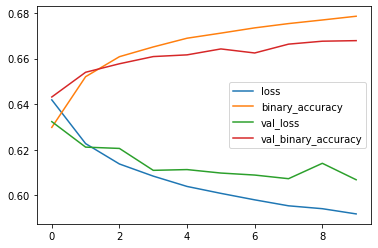

In [646]:
pd.DataFrame(history.history).plot()